In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
# Import the 2012-2014 data for data munging

# Source: 
import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

enc = find_encoding("datasets/mrt_daily_ridership/2014.csv")
print("Encoding: {}".format(enc))

df_2014 = pd.read_csv("datasets/mrt_daily_ridership/2014.csv", encoding=enc)
df_2013 = pd.read_csv("datasets/mrt_daily_ridership/2013.csv", encoding=enc)
df_2012 = pd.read_csv("datasets/mrt_daily_ridership/2012.csv", encoding=enc)

df_2014['year'] = 2014
df_2013['year'] = 2013
df_2012['year'] = 2012

Encoding: ascii


# Cleaning the Data

In [216]:
# 2013's dataset contains missing days
df_2013['day'] = df_2013['day'].fillna(method='ffill')

# Convert month names to integers
MONTH_INT = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12,
    'Febuary': 2, # February is misspelt...
    'Feb': 2, # ONLY February has an abbreviation...
}

df_2014['month'] = df_2014['month'].apply(lambda x: MONTH_INT[x.strip()])
df_2013['month'] = df_2013['month'].apply(lambda x: MONTH_INT[x.strip()])
df_2012['month'] = df_2012['month'].apply(lambda x: MONTH_INT[x.strip()])

In [217]:
df = pd.concat([df_2014, df_2013, df_2012])
df.head()

,month,day,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,...,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit,year
0,1,1.0,03:00 - 03:59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2014
1,1,1.0,04:00 - 04:59,74,0,24,0,20,0,38,...,0,0,0,0,0,0,0,0,0,2014
2,1,1.0,05:00 - 05:59,525,88,191,47,121,20,403,...,104,51,114,124,333,84,121,417,307,2014
3,1,1.0,06:00 - 06:59,663,601,344,310,187,123,619,...,285,185,179,489,604,334,198,935,822,2014
4,1,1.0,07:00 - 07:59,831,965,358,436,231,178,746,...,418,239,200,467,847,458,274,1240,1477,2014


In [218]:
# Check the dtypes of each column

df.dtypes

month                    int64
day                    float64
time                    object
north_avenue_entry      object
north_avenue_exit       object
quezon_avenue_entry     object
quezon_avenue_exit      object
gma_kamuning_entry      object
gma_kamuning_exit       object
cubao_entry             object
cubao_exit              object
santolan_entry          object
santolan_exit           object
ortigas_entry           object
ortigas_exit            object
shaw_blvd_entry         object
shaw_blvd_exit          object
boni_avenue_entry       object
boni_avenue_exit        object
guadalupe_entry         object
guadalupe_exit          object
buendia_entry           object
buendia_exit            object
ayala_avenue_entry      object
ayala_avenue_exit       object
magallanes_entry        object
magallanes_exit         object
taft_entry              object
taft_exit               object
year                     int64
dtype: object

In [219]:
# Coerce objects to numeric
df.iloc[:, 3:-1] = df.iloc[:, 3:-1].apply(lambda x: pd.to_numeric(x, errors="coerce"))

# Replace nulls with zero
df.fillna(0, inplace=True)

# Typecast all to int
df.iloc[:, 3:-1] = df.iloc[:, 3:-1].applymap(int)

# Typecast day to int
df['day'] = df['day'].apply(int)

df.dtypes

month                   int64
day                     int64
time                   object
north_avenue_entry      int64
north_avenue_exit       int64
quezon_avenue_entry     int64
quezon_avenue_exit      int64
gma_kamuning_entry      int64
gma_kamuning_exit       int64
cubao_entry             int64
cubao_exit              int64
santolan_entry          int64
santolan_exit           int64
ortigas_entry           int64
ortigas_exit            int64
shaw_blvd_entry         int64
shaw_blvd_exit          int64
boni_avenue_entry       int64
boni_avenue_exit        int64
guadalupe_entry         int64
guadalupe_exit          int64
buendia_entry           int64
buendia_exit            int64
ayala_avenue_entry      int64
ayala_avenue_exit       int64
magallanes_entry        int64
magallanes_exit         int64
taft_entry              int64
taft_exit               int64
year                    int64
dtype: object

In [221]:
# Remove entries for September 31, 2013 (that date doesn't exist)

df = df[(df['year'] != 2013) | (df['month'] != 9) | (df['day'] != 31)]

# Convert the month and day columns into a date

df["date"] = pd.to_datetime(df[['month', 'day', 'year']])

# Reorder the columns

cols = df.columns.tolist()
new_cols = ['date', 'month', 'day', 'year', 'time'] + cols[3:-2]

df = df[new_cols]
df.head()

,date,month,day,year,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,2014-01-01,1,1,2014,03:00 - 03:59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,1,1,2014,04:00 - 04:59,74,0,24,0,20,...,3,0,0,0,0,0,0,0,0,0
2,2014-01-01,1,1,2014,05:00 - 05:59,525,88,191,47,121,...,128,104,51,114,124,333,84,121,417,307
3,2014-01-01,1,1,2014,06:00 - 06:59,663,601,344,310,187,...,376,285,185,179,489,604,334,198,935,822
4,2014-01-01,1,1,2014,07:00 - 07:59,831,965,358,436,231,...,458,418,239,200,467,847,458,274,1240,1477


### Sanity Check

In [223]:
# Sanity check: check the time values
df['time'].unique()

array(['03:00 - 03:59', '04:00 - 04:59', '05:00 - 05:59', '06:00 - 06:59',
       '07:00 - 07:59', '08:00 - 08:59', '09:00 - 09:59', '10:00 - 10:59',
       '11:00 - 11:59', '12:00 - 12:59', '13:00 - 13:59', '14:00 - 14:59',
       '15:00 - 15:59', '16:00 - 16:59', '17:00 - 17:59', '18:00 - 18:59',
       '19:00 - 19:59', '20:00 - 20:59', '21:00 - 21:59', '22:00 - 22:59',
       '23:00 - 23:59', '00:00 - 00:59', '01:00 - 01:59', '02:00 - 02:59'],
      dtype=object)

In [224]:
# Check the entries for 1 day
df[df['date'] == '2014-01-01']['date'].count()

24

In [225]:
# Save the existing dataset to a csv

df.to_pickle("cleaned_datasets/mrt_daily_ridership/total.pkl")

# Load cleaned data

In [226]:
df = pd.read_pickle("cleaned_datasets/mrt_daily_ridership/total.pkl")
df = df.reset_index()
df = df.drop(columns=['index'])
df.head()

,date,month,day,year,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,2014-01-01,1,1,2014,03:00 - 03:59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,1,1,2014,04:00 - 04:59,74,0,24,0,20,...,3,0,0,0,0,0,0,0,0,0
2,2014-01-01,1,1,2014,05:00 - 05:59,525,88,191,47,121,...,128,104,51,114,124,333,84,121,417,307
3,2014-01-01,1,1,2014,06:00 - 06:59,663,601,344,310,187,...,376,285,185,179,489,604,334,198,935,822
4,2014-01-01,1,1,2014,07:00 - 07:59,831,965,358,436,231,...,458,418,239,200,467,847,458,274,1240,1477


# Daily System-wide Ridership

In [228]:
# Get only the entries columns
cols = df.columns
cols = [x for x in cols if "_exit" not in x]
df_entry = df[cols]

In [229]:
# Add across stations
df_entry["total_entry"] = df_entry.iloc[:, 5:].sum(axis=1)
df_entry = df_entry[['date', 'time', 'total_entry']]
df_entry.head()

C:\Users\FrancisZac\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,time,total_entry
0,2014-01-01,03:00 - 03:59,0
1,2014-01-01,04:00 - 04:59,159
2,2014-01-01,05:00 - 05:59,2402
3,2014-01-01,06:00 - 06:59,4986
4,2014-01-01,07:00 - 07:59,6177


In [230]:
# Add across timeslots in a day
df_entry = df_entry.groupby('date').agg({'total_entry': np.sum}).reset_index()
df_entry.head()

,date,total_entry
0,2012-01-01,168983
1,2012-01-02,429076
2,2012-01-03,501922
3,2012-01-04,506575
4,2012-01-05,507024


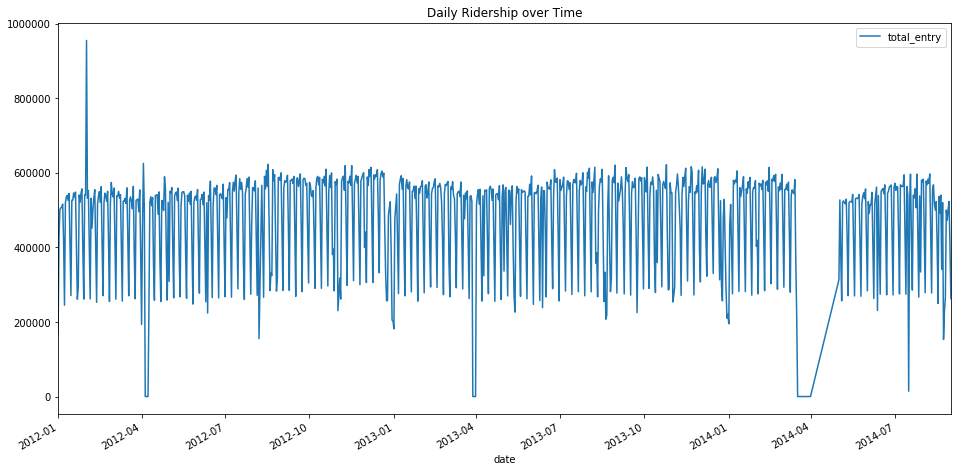

In [231]:
#plt.plot(df_2014_entry['date'], df_2014_entry['total_entry'])
#plt.xlabel('Date')
#plt.ylabel('Passengers Serviced')
#plt.show(aspect='auto')

df_entry.plot('date', 'total_entry', title='Daily Ridership over Time', figsize=(16,8))

# Weekly System-wide Ridership

In [245]:
df_entry['week'] = df_entry['date'].apply(lambda date: (date.isocalendar()[0], date.isocalendar()[1]))
df_entry_byweek = df_entry.groupby('week').sum().reset_index()
df_entry_byweek.head()

,week,total_entry
0,"(2011, 52)",168983
1,"(2012, 1)",3126045
2,"(2012, 2)",3348767
3,"(2012, 3)",3357055
4,"(2012, 4)",3111883


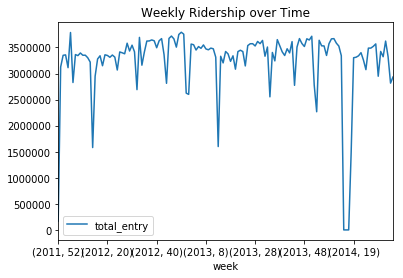

In [248]:
df_entry_byweek.plot('week', 'total_entry', title='Weekly Ridership over Time')

# Daily Ridership Heatmaps

In [254]:
df_netservice = df.groupby('time').mean().reset_index()
df_netservice.head()

,time,month,day,year,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,00:00 - 00:59,6.083775,15.73913,2012.837752,0.008484,0.005302,0.001060,0.001060,0.002121,0.002121,...,0.002121,0.002121,0.000000,0.000000,0.001060,0.001060,0.000000,0.000000,0.000000,0.00000
1,01:00 - 01:59,6.083775,15.73913,2012.837752,0.003181,0.002121,0.003181,0.002121,0.001060,0.000000,...,0.000000,0.002121,0.000000,0.000000,0.004242,0.002121,0.000000,0.000000,0.000000,0.00000
2,02:00 - 02:59,6.083775,15.73913,2012.837752,0.002121,0.002121,0.000000,0.000000,0.000000,0.000000,...,0.002121,0.003181,0.000000,0.000000,0.004242,0.007423,0.000000,0.000000,0.000000,0.00000
3,03:00 - 03:59,6.083775,15.73913,2012.837752,0.015907,0.001060,0.230117,0.000000,0.146341,0.000000,...,0.001060,0.001060,0.001060,0.001060,0.003181,0.004242,0.000000,0.000000,0.001060,0.00106
4,04:00 - 04:59,6.083775,15.73913,2012.837752,194.142100,0.766702,127.459173,1.893955,86.091198,0.893955,...,6.906681,3.714740,1.240721,2.891835,2.867444,5.522800,4.564157,4.092259,14.252386,3.92789


In [258]:
# Get the net passenger service (entry - exit)

df_netservice = df.groupby('time').mean().reset_index()

for entry in df_netservice.columns[4::2]:
    exit = entry.replace('entry', 'exit')
    df_netservice[entry] = df_netservice[entry] - df_netservice[exit]
    
cols = [x for x in df_netservice.columns if 'exit' not in x]
cols = [x for x in cols if x not in ['month', 'day', 'year']]
df_netservice = df_netservice[cols]

cols = [x.replace('_entry', '') for x in cols]
df_netservice.columns = cols
df_netservice.head()


,time,north_avenue,quezon_avenue,gma_kamuning,cubao,santolan,ortigas,shaw_blvd,boni_avenue,guadalupe,buendia,ayala_avenue,magallanes,taft
0,00:00 - 00:59,0.003181,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002121,0.001060,0.000000,0.000000,0.000000,0.000000,0.000000
1,01:00 - 01:59,0.001060,0.001060,0.001060,0.000000,0.000000,0.003181,0.003181,0.001060,-0.002121,0.000000,0.002121,0.000000,0.000000
2,02:00 - 02:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001060,0.000000,-0.003181,0.000000,0.000000
3,03:00 - 03:59,0.014846,0.230117,0.146341,0.328738,0.004242,0.000000,0.028632,0.000000,0.000000,0.000000,-0.001060,0.000000,0.000000
4,04:00 - 04:59,193.375398,125.565217,85.197243,174.920467,5.342524,1.891835,24.376458,2.652174,3.191941,-1.651113,-2.655355,0.471898,10.324496


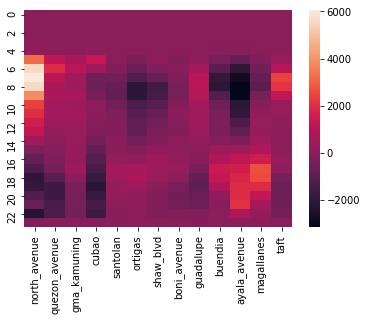

In [262]:
ax = sns.heatmap(df_netservice.iloc[:, 1:])
plt.show()

In [263]:
df['weekday'] = df['date'].apply(lambda x: (x.weekday() + 1) % 7)
df_byweekday = df.groupby(['weekday', 'time']).mean().reset_index()
df_byweekday.head()

,weekday,time,month,day,year,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,0,00:00 - 00:59,6.117647,15.485294,2012.838235,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.007353,0.000000,0.000000,0.007353,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,01:00 - 01:59,6.117647,15.485294,2012.838235,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,02:00 - 02:59,6.117647,15.485294,2012.838235,0.007353,0.007353,0.000000,0.000000,0.000000,...,0.000000,0.007353,0.000000,0.000000,0.007353,0.007353,0.000000,0.000000,0.000000,0.000000
3,0,03:00 - 03:59,6.117647,15.485294,2012.838235,0.000000,0.000000,0.066176,0.000000,0.022059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007353,0.007353
4,0,04:00 - 04:59,6.117647,15.485294,2012.838235,135.838235,0.205882,60.919118,0.404412,31.161765,...,2.882353,0.536765,0.639706,0.301471,1.654412,1.227941,1.191176,0.786765,4.691176,0.625000


In [264]:
for entry in df_byweekday.columns[5::2]:
    exit = entry.replace('entry', 'exit')
    df_byweekday[entry] = df_byweekday[entry] - df_byweekday[exit]
    
cols = [x for x in df_byweekday.columns if 'exit' not in x]
cols = [x for x in cols if x not in ['month', 'day', 'year']]
df_byweekday = df_byweekday[cols]

cols = [x.replace('_entry', '') for x in cols]
df_byweekday.columns = cols
df_byweekday.head()

,weekday,time,north_avenue,quezon_avenue,gma_kamuning,cubao,santolan,ortigas,shaw_blvd,boni_avenue,guadalupe,buendia,ayala_avenue,magallanes,taft
0,0,00:00 - 00:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007353,0.000000,0.007353,0.000000,0.000000
1,0,01:00 - 01:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007353,-0.014706,0.000000,0.000000,0.000000,0.000000
2,0,02:00 - 02:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007353,0.000000,0.000000,0.000000,0.000000
3,0,03:00 - 03:59,0.000000,0.066176,0.022059,0.073529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,04:00 - 04:59,135.632353,60.514706,31.058824,83.227941,2.022059,1.242647,13.242647,2.367647,2.345588,0.338235,0.426471,0.404412,4.066176


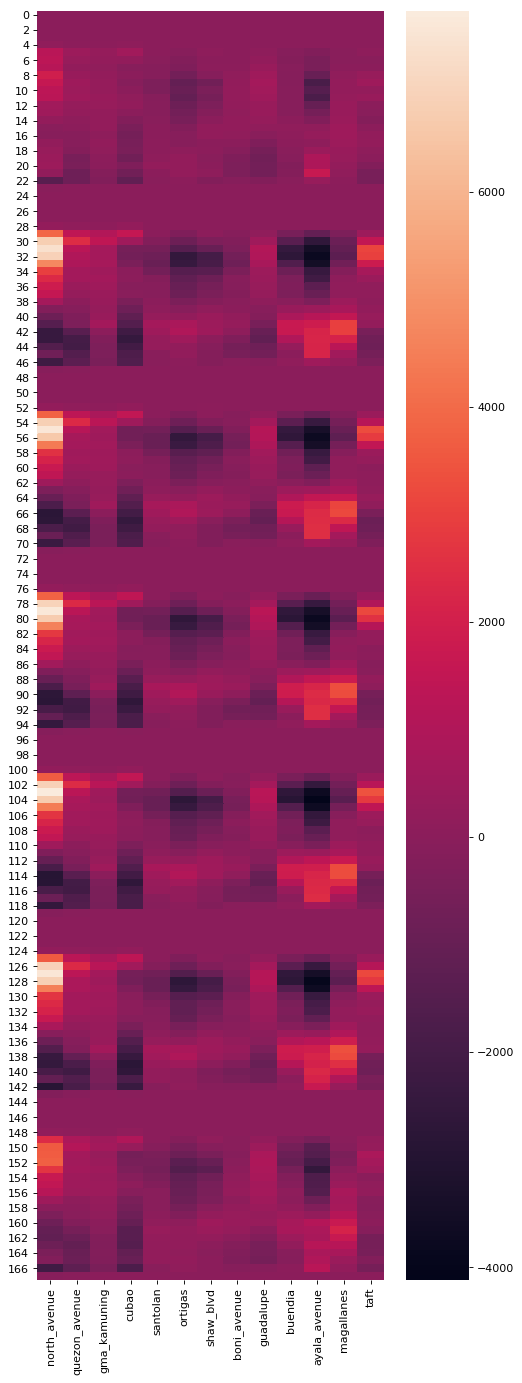

In [265]:
# Show the progression of the heatmap from Sunday to Saturday

from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 21), dpi=80, facecolor='w', edgecolor='k')

sns.heatmap(df_byweekday.iloc[:, 2:])
plt.show()